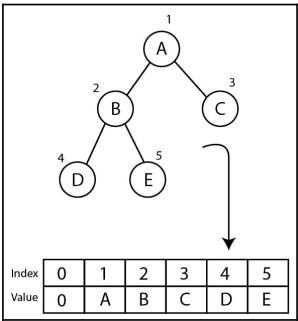

In [11]:
class Heap:
    def __init__(self):
        self.heap = [0]
        self.size = 0
        
    #/////----- INSERT OPERATION -----/////
    #This method ensures that the elements are ordered properly.
    def arrange(self, k):
        # loop until we have reached the root node
        while k // 2 > 0:
        #while k > 1:
            #Compare between the parent and child.
            #If the parent is greater than the child, swap the two values:
            if self.heap[k] < self.heap[k//2]:
                self.heap[k], self.heap[k//2] = self.heap[k//2], self.heap[k]
            #Finally, let's not forget to move up the tree
            k //= 2
         #we just need to call this from our insert method
    
    def insert(self, item):
        self.heap.append(item)
        self.size += 1
        #calls the arrange() method to reorganize the heap as necessary.
        self.arrange(self.size)
    
    #/////----- POP OPERATION -----/////
    #determine which of the children to compare against the parent node.
    def minindex(self, k):
        #We may get beyond the end of the list—if we do, then we return the index of the left child:
        if k * 2 + 1 > self.size:
            return k * 2
        #Otherwise, we simply return the index of the lesser of the two children:
        elif self.heap[k*2] < self.heap[k*2+1]:
            return k * 2
        else:
            return k * 2 + 1
    
    def sink(self, k):
        #loop so that we can sink our element down as far as is needed:
        while k*2 <= self.size:
            #which of the left or the right children to compare against 
            mi = self.minindex(k)
            #we compare parent and child to see whether we need to make the swap:
            if self.heap[k] > self.heap[mi]:
                self.heap[k], self.heap[mi] = self.heap[mi], self.heap[k]
            #make sure that we move down the tree, so that we don't get stuck in a loop
            k = mi
    #implement the main pop() method:
    def pop(self):
        item = self.heap[1]
        self.heap[1] = self.heap[self.size]
        self.size -= 1
        self.heap.pop()
        self.sink(1)
        return item
    
    def heap_sort(self):
        sorted_list = []
        for node in range(self.size):
            n = self.pop()
            sorted_list.append(n)
        return sorted_list
            
    

<h2>Testing the heap</h2>

Now, let's begin by creating the heap and inserting that data, as shown in the following
code:

In [12]:
h = Heap()
for i in (4, 8, 7, 2, 9, 10, 5, 1, 3, 6):
    h.insert(i)

We can print the heap list, just to inspect how the elements are ordered. If you redraw this
as a tree structure, you would notice that it meets the required properties of a heap, similar
to what we created manually:

In [13]:
print(h.heap)

[0, 1, 2, 5, 3, 6, 10, 7, 8, 4, 9]


Now we will pop off the items, one at a time. Notice how the items come out in a sorted
order, from lowest to highest. Also, notice how the heap list changes after each pop. The
sink() method will reorganize all the items in the heap:

In [14]:
for i in range(10):
    n = h.pop()
    print(n)
    print(h.heap)

1
[0, 2, 3, 5, 4, 6, 10, 7, 8, 9]
2
[0, 3, 4, 5, 8, 6, 10, 7, 9]
3
[0, 4, 6, 5, 8, 9, 10, 7]
4
[0, 5, 6, 7, 8, 9, 10]
5
[0, 6, 8, 7, 10, 9]
6
[0, 7, 8, 9, 10]
7
[0, 8, 10, 9]
8
[0, 9, 10]
9
[0, 10]
10
[0]


We have discussed, in the preceding section, the concepts around using the min-heap, so it
should be a simple task to implement a max-heap by simply reversing the logic.

We will use the min-heap that we discussed here again in Chapter 10, Sorting, on sorting
algorithms, and will rewrite the code for sorting the elements in the list. These algorithms
are called heap sort algorithms.